# Integration

## Single Integrals

$$\int_{a}^{b} f(x)dx$$

```
scipy.integrate.quad(f, a, b)
```

* Where ‘f’ is the name of the function to be integrated. 
* ‘a’ and ‘b’ are the lower and upper limits

In [1]:
import scipy.integrate
from numpy import exp
f= lambda x:exp(-x**2)
i = scipy.integrate.quad(f, 0, 1)
i

(0.7468241328124271, 8.291413475940725e-15)

## Multiple Integrals
The mechanics for double and triple integration have been wrapped up into the functions dblquad, tplquad and nquad

### Double Integrals
$$\int_{0}^{1/2} dy \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx$$
```
scipy.integrate.dblquad(f, 0, 0.5, g, h)
```
We define the functions f, g, and h, using the lambda expressions

In [2]:
import scipy.integrate
from numpy import exp
from math import sqrt
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
i

(0.5, 1.7092350012594845e-14)

# Interpolation
* Interpolation is the process of estimating  a value between two points on a line or a curve.
* This helps to determine the data points in between the given data ones. 
* This method is always needed to compute the value of a function for an intermediate value of the independent function. In short, interpolation is a process of determining the unknown values that lie in between the known data points
* Differences Between Interpolation and Regression
  * The approximated function should match exactly for all the dataset points in interpolation.
  * However, in case of regression the approximated function does not have to match exactly. 

In [3]:
import numpy as np
x = np.array([0,1,2,3,4,5])
y = np.array([0.1,0.25,0.3,0.5,1.0,0.9])

# 1D interpolation
from scipy.interpolate import interp1d
f = interp1d(x,y,kind='cubic')
print(f(4.5)) # predict at 4.5

1.0983333333333334


## 1D Interpolation
The `scipy.interpolate` package has a function for one (`interp1d`) dimensional interpolation where `kind` is `nearest`, `previous`, `next`, `zero`, `linear`, `quadratic`, `cubic`, or a number as `0`-`3`.

In [4]:
import numpy as np
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)
print(x, y)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


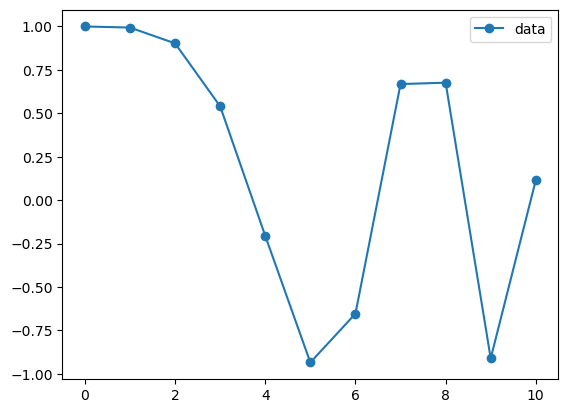

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y, '-', marker='o',label='data')
plt.legend(loc='best')
plt.show()

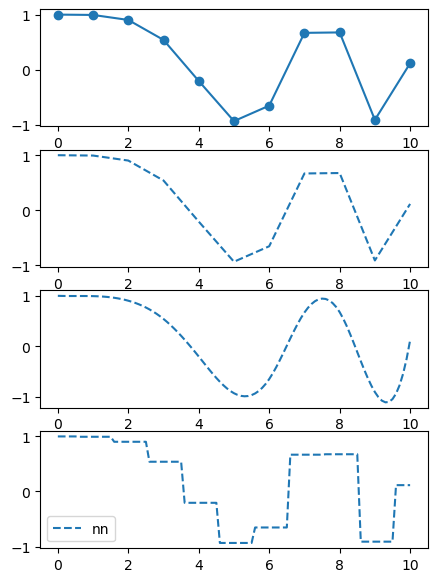

In [6]:
from scipy import interpolate
fig, ax = plt.subplots(4, 1, figsize=(5, 7))
linear=interpolate.interp1d(x, y, kind='linear')
cubic=interpolate.interp1d(x, y, kind='cubic')
nn=interpolate.interp1d(x, y, kind='nearest')

xnew = np.linspace(0, 10, num=101)

ynew_linear = linear(xnew)
ynew_cubic = cubic(xnew)
ynew_nn=nn(xnew)

# print(xnew)
ax[0].plot(x, y, marker='o', label='data')
ax[1].plot(xnew, ynew_linear, '--', label='linear')
ax[2].plot(xnew, ynew_cubic, '--', label='cubic')
ax[3].plot(xnew, ynew_nn, '--', label='nn')

plt.legend()
plt.show()

## Exercise 
Create a linear interpolation with the following data. Display with plot for all kind of methods for interploation.

```python
xr = [0.0,1.0,2.0,5.0]
yr = [0.2,0.4,1.05,1.7]
```

## 2D Interpolation

There is also a function for two dimensional (`interp2d`) interpolation where `kind` is `linear` or `cubic`.

In [7]:
from scipy.interpolate import interp2d
x2 = np.arange(-1.5, 1.01, 0.5)
y2 = np.arange(-1.5, 1.01, 0.5)
xx, yy = np.meshgrid(x2, y2)
zz = np.sin(xx**2+yy**2)
f2 = interp2d(x2, y2, zz, kind='cubic')
print(f2(4.5,1)) # predict z at (x=4.5, y=1)

[0.90929743]


C:\Users\vwadhawan\AppData\Local\Temp\ipykernel_2776\1689263119.py:6: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f2 = interp2d(x2, y2, zz, kind='cubic')
C:\Users\vwadhawan\AppData\Local\Temp\ipykernel_2776\1689263119.py:7: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
     

C:\Users\vwadhawan\AppData\Local\Temp\ipykernel_2776\2024446094.py:11: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fe[i,j] = f2(xxe[i,j],yye[i,j])


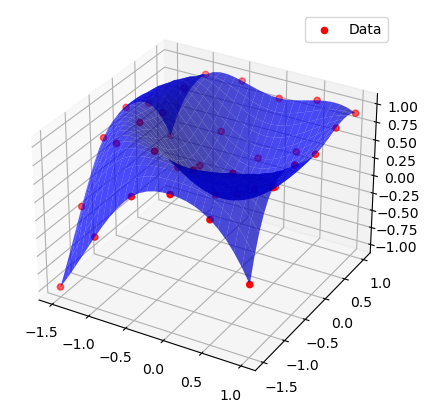

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx,yy,zz,color='red',label='Data')
xe = np.arange(-1.5, 1.01, 0.1)
ye = np.arange(-1.5, 1.01, 0.1)
xxe, yye = np.meshgrid(xe, ye)
fe = np.empty_like(xxe)
for i in range(np.size(fe,0)):
    for j in range(np.size(fe,1)):
        fe[i,j] = f2(xxe[i,j],yye[i,j])
ax.plot_surface(xxe,yye,fe,color='blue',alpha=0.7)
plt.legend()
plt.show()